<a href="https://colab.research.google.com/github/balasubramani12/LinkedList/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [43]:
# Load the dataset
data_path = "/content/raw_data.csv"  # Path to your raw dataset
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No  

In [44]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (example: fill numerical columns with median and categorical with mode)
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical column
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical column
        df[col].fillna(df[col].median(), inplace=True)

# Verify missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing Values After Handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-44-98030795502e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-44-98030795502e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [45]:
# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print("\nNumber of Duplicates After Removal:", df.duplicated().sum())


Number of Duplicates: 0

Number of Duplicates After Removal: 0


In [46]:
# Print all column names
print("Columns in DataFrame:")
print(df.columns)

Columns in DataFrame:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


<ipython-input-48-6e2147eba593>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


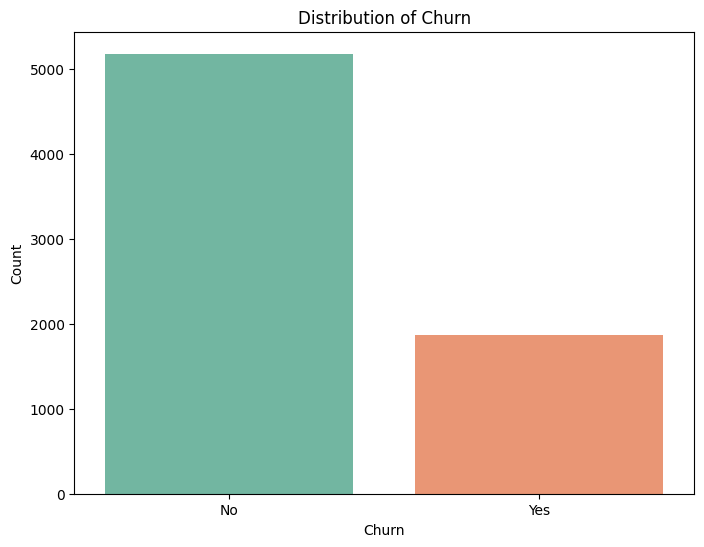


Class Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [48]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Check class imbalance
churn_counts = df['Churn'].value_counts()
print("\nClass Distribution:")
print(churn_counts)

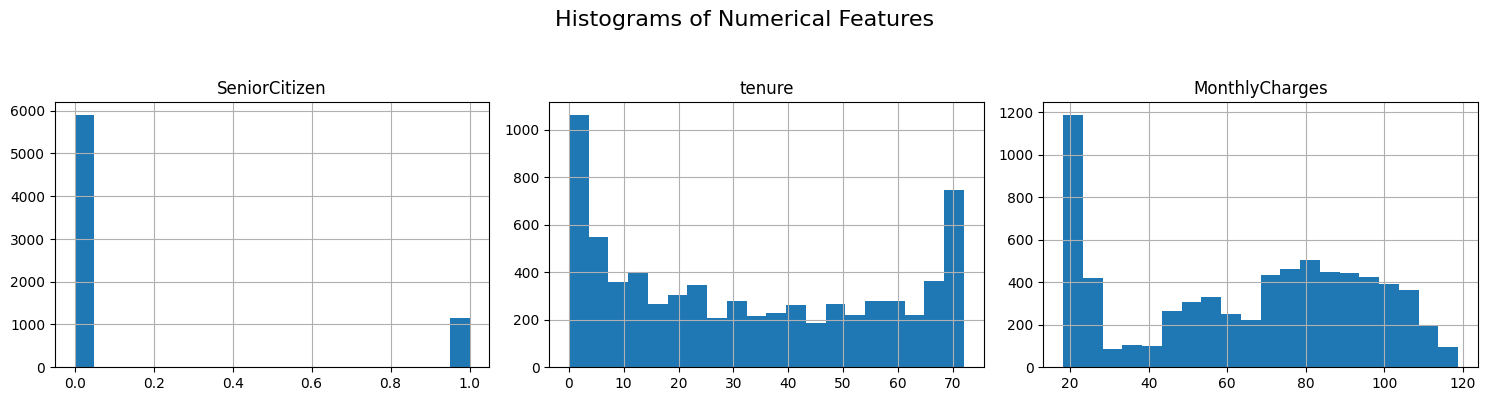

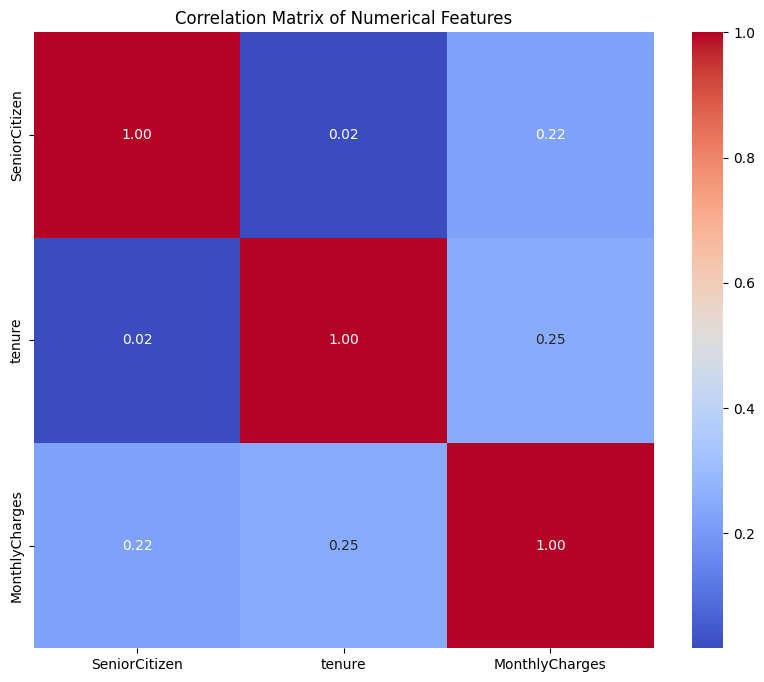

In [49]:
# Analyze numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

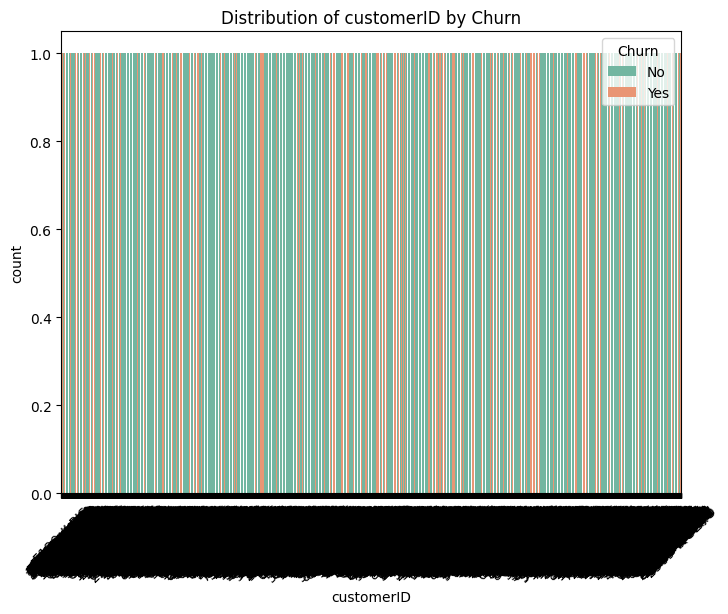

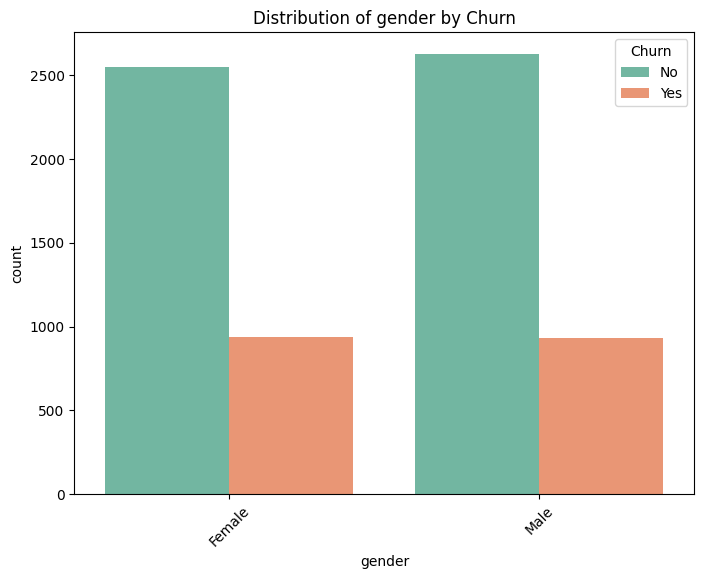

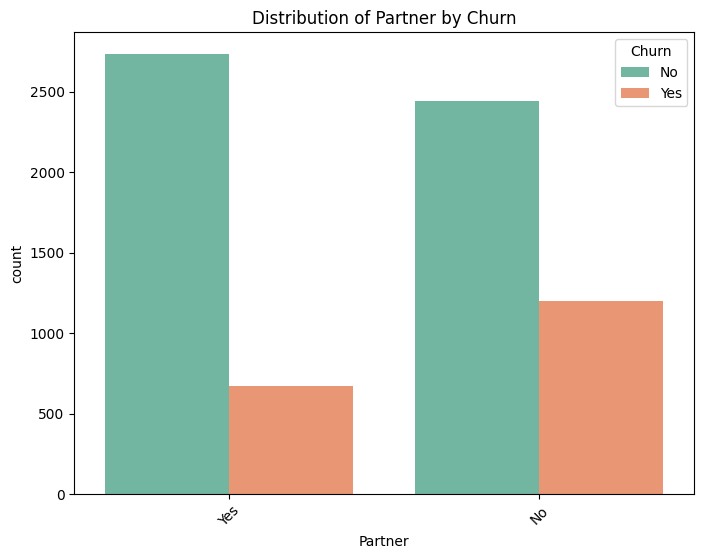

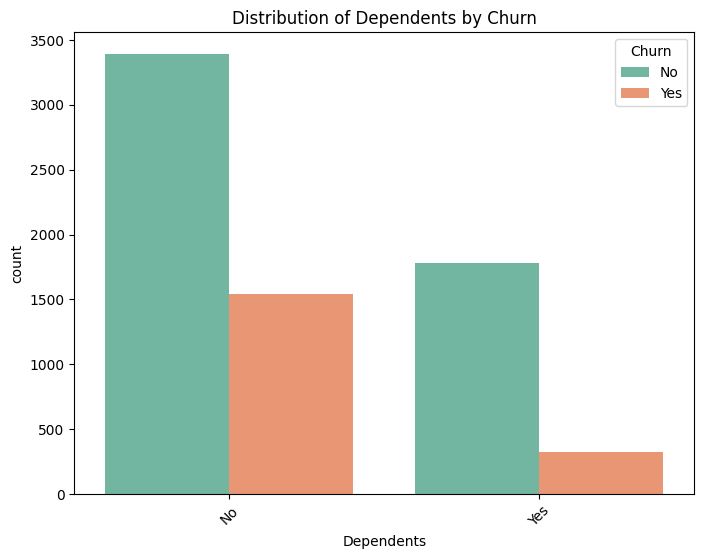

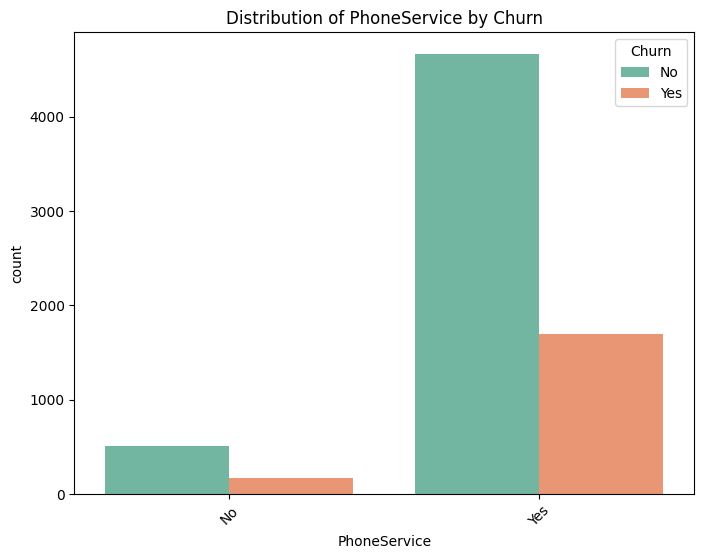

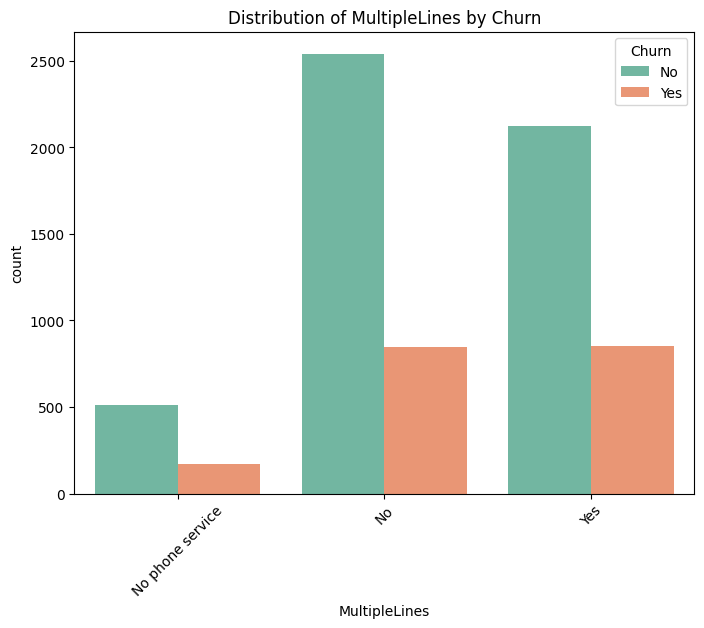

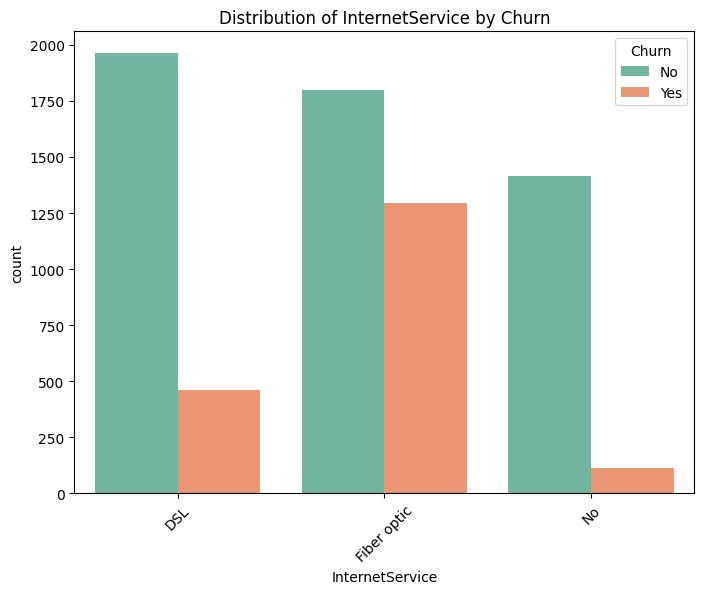

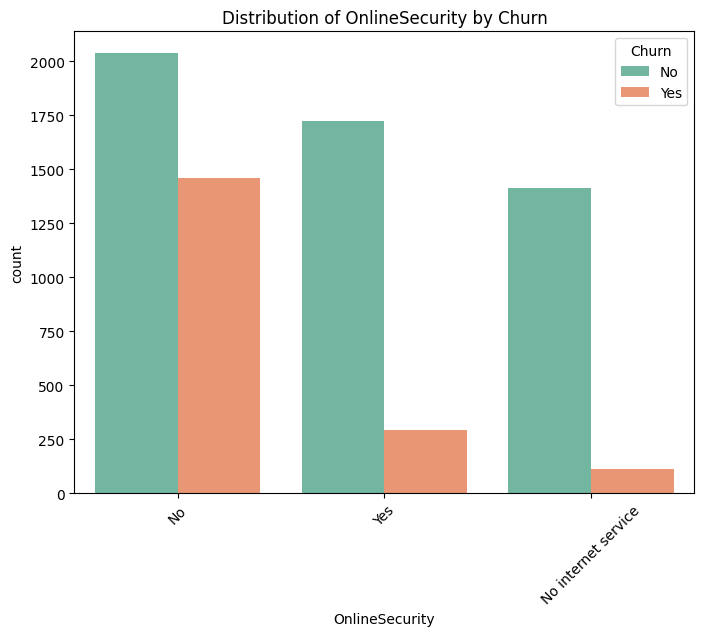

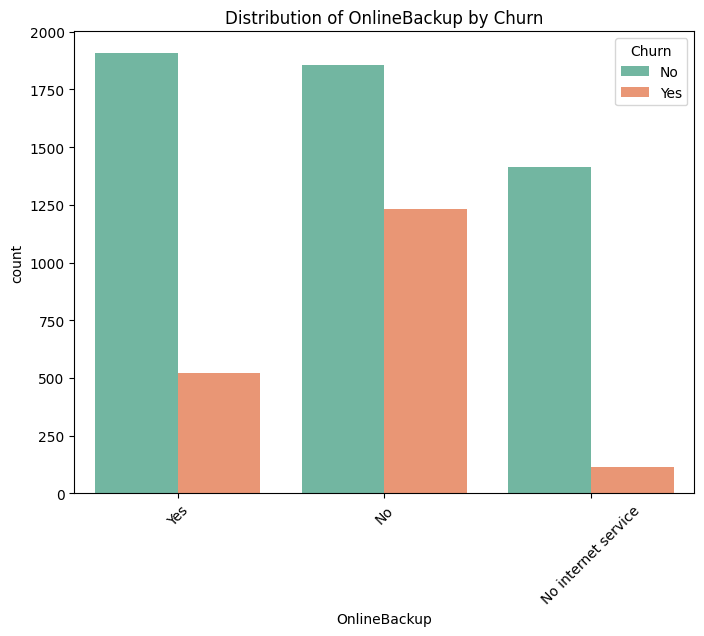

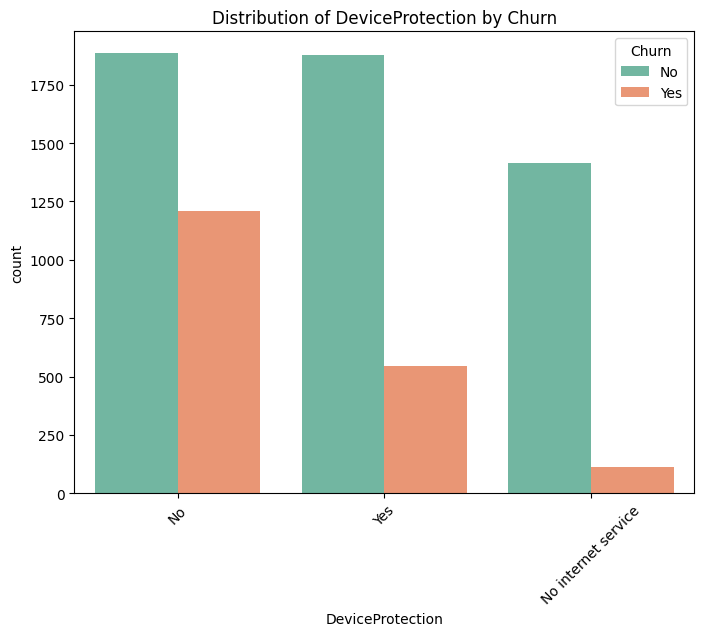

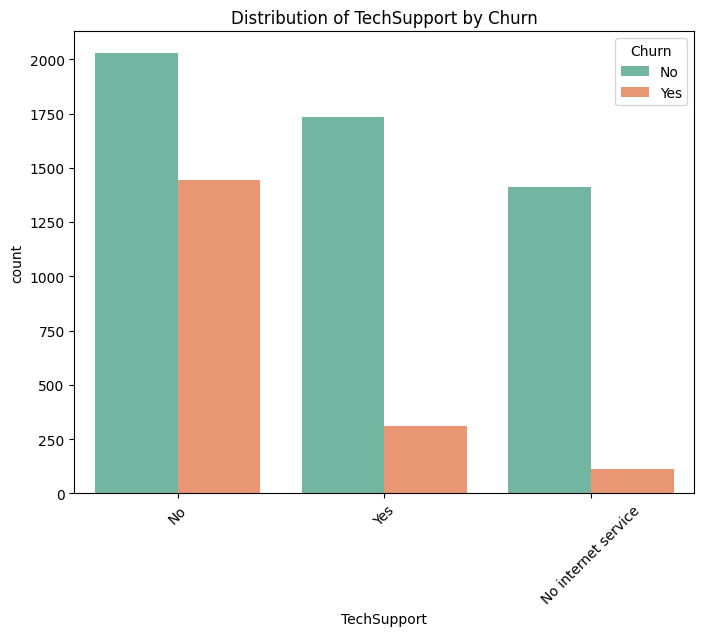

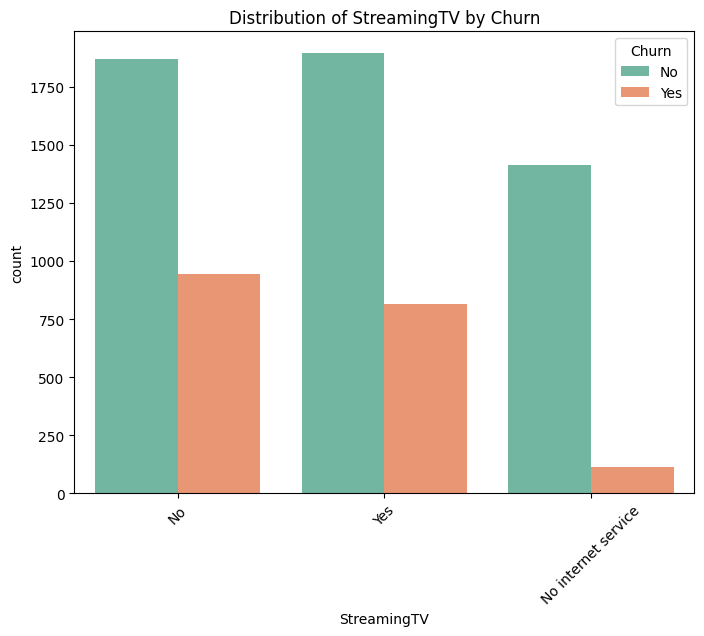

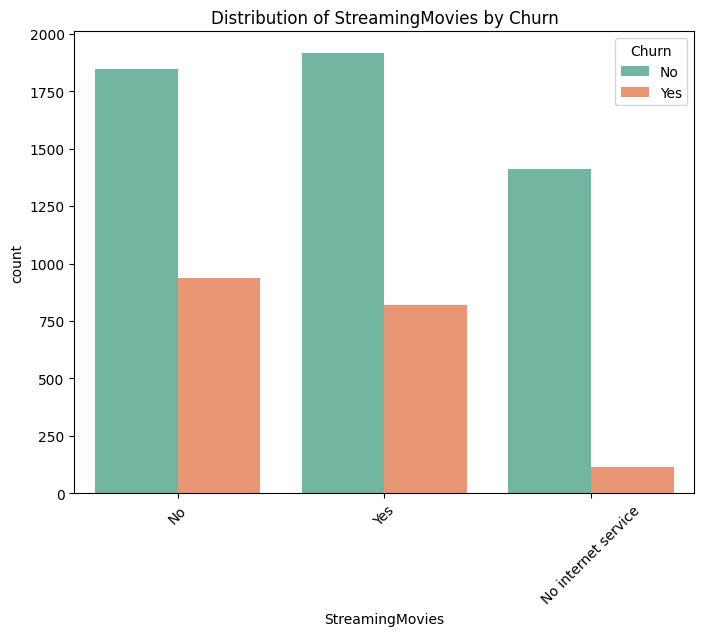

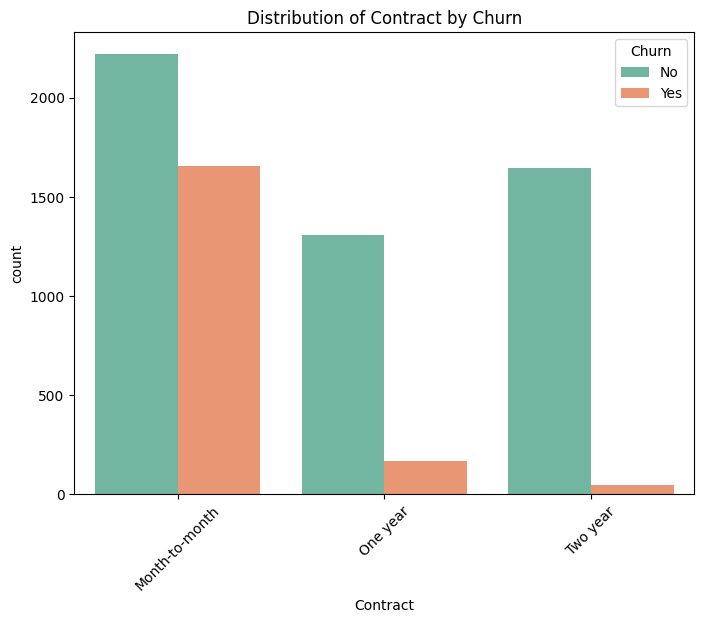

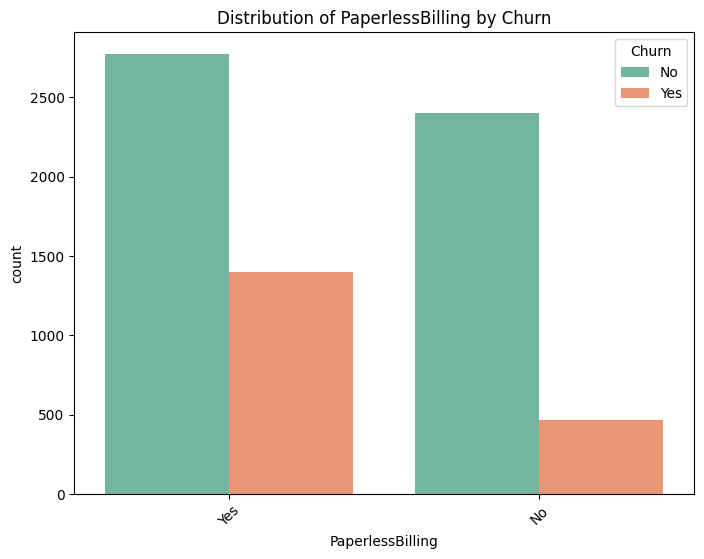

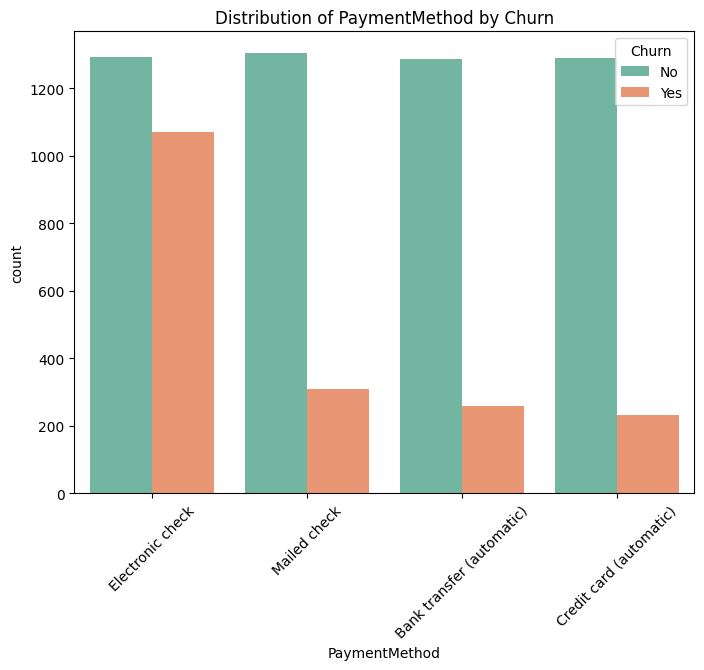

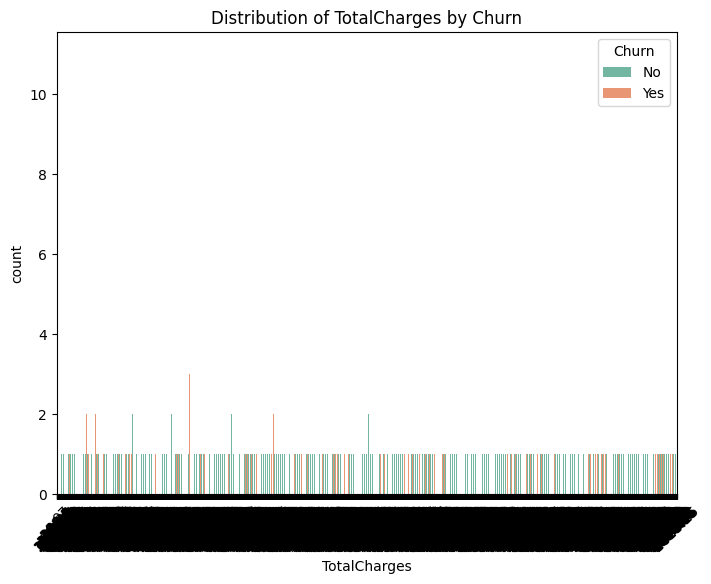

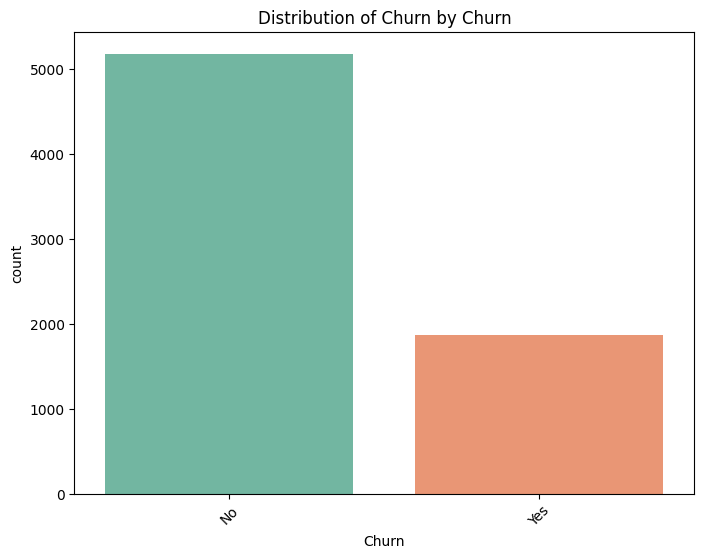

In [50]:
# Analyze categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Plot count plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f"Distribution of {col} by Churn")
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-52-ed3d5b68a497>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


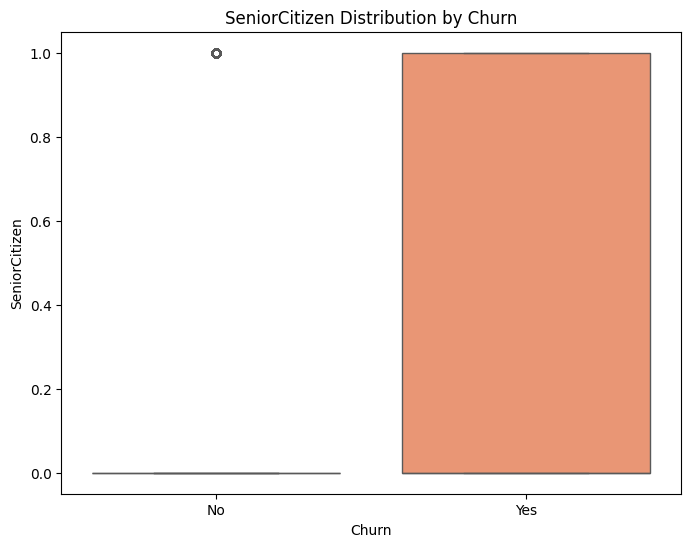

<ipython-input-52-ed3d5b68a497>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


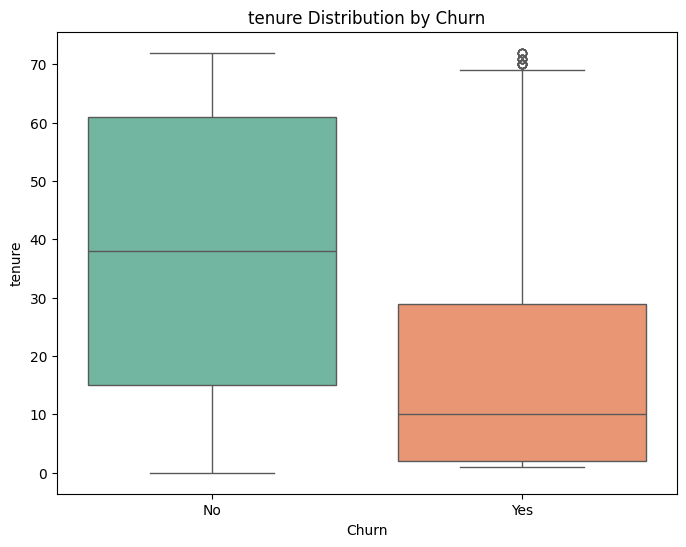

<ipython-input-52-ed3d5b68a497>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


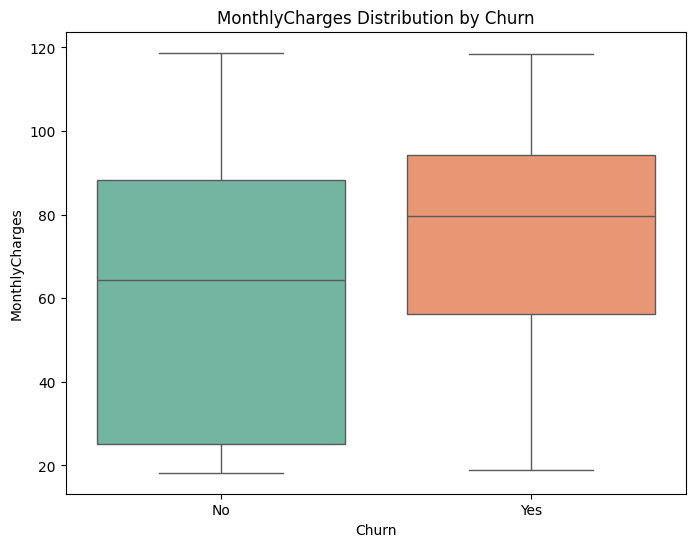

In [52]:
# Boxplots for numerical features vs Churn
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f"{col} Distribution by Churn")
    plt.show()

In [58]:
# Remove customerID-related columns
df = df.loc[:, ~df.columns.str.startswith('customerID')]

# Verify the remaining columns
print("Columns after removing customerID-related columns:")
print(df.columns)

Columns after removing customerID-related columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=6560)


In [56]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Churn'] == 'No']
df_minority = df[df['Churn'] == 'Yes']

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,               # Sample with replacement
                                 n_samples=len(df_majority), # Match majority class size
                                 random_state=42)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Verify the new class distribution
print("\nClass Distribution After Balancing:")
print(df_balanced['Churn'].value_counts())

# Save the balanced dataset
df_balanced.to_csv("/content/raw_data.csv", index=False)


Class Distribution After Balancing:
Churn
No     5174
Yes    5174
Name: count, dtype: int64


In [57]:
# Example: Create a new feature 'AvgMonthlyUsage'
if 'TotalCharges' in df.columns and 'Tenure' in df.columns:
    df['AvgMonthlyUsage'] = df['TotalCharges'] / df['Tenure']
    df['AvgMonthlyUsage'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle division by zero
    df['AvgMonthlyUsage'].fillna(0, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Save the preprocessed dataset
df.to_csv("/content/raw_data.csv", index=False)

In [60]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Churn_Yes'])  # Replace 'Churn' with the actual target column name
y = df['Churn_Yes']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Save the split datasets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv("/content/train_data.csv", index=False)
test_data.to_csv("/content/test_data.csv", index=False)

print("\nDatasets Split Successfully!")


Datasets Split Successfully!
